# Lab | Unsupervised Learning

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from tqdm import tqdm
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.manifold import TSNE

In [2]:
data = pd.read_csv('combined_tracks.csv')
data

,title,artists,id,artists_ids,album,album_id,year,danceability,energy,key,...,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature
0,Lego,Mark Forster,3eIWbWHQpCRJQ8kCa36tTA,7qXzy6c5RWT0XlVQcOBIDG,Lego,1vPl595eQRgN2gGVzPt6jQ,2023,0.834,0.592,7.0,...,0.000053,0.1120,0.697,128.103,audio_features,spotify:track:3eIWbWHQpCRJQ8kCa36tTA,https://api.spotify.com/v1/tracks/3eIWbWHQpCRJ...,https://api.spotify.com/v1/audio-analysis/3eIW...,160920.0,4.0
1,Liquor and Weed,Coi Leray,0o4HDwcuJ6RVHVtcOGq8rB,6AMd49uBDJfhf30Ak2QR5s,Blue Moon,55LEmUjDllfMjPxzSSm4HU,2023,0.610,0.590,2.0,...,0.000000,0.0910,0.293,170.061,audio_features,spotify:track:0o4HDwcuJ6RVHVtcOGq8rB,https://api.spotify.com/v1/tracks/0o4HDwcuJ6RV...,https://api.spotify.com/v1/audio-analysis/0o4H...,157467.0,4.0
2,We Could Be Love,"Hayden James, AR/CO",3y20RxZMr3wZMvhC78jc8O,"4csQIMQm6vI2A2SCVDuM2z, 7mGI9Sd66FqHjIkwzkgbG7",We Could Be Love,4p3Eue4nXRORfFiID2811z,2023,0.608,0.739,10.0,...,0.000397,0.1300,0.301,130.025,audio_features,spotify:track:3y20RxZMr3wZMvhC78jc8O,https://api.spotify.com/v1/tracks/3y20RxZMr3wZ...,https://api.spotify.com/v1/audio-analysis/3y20...,189113.0,4.0
3,Rosaroter Rausch,BEVN,1JxVRwmJkEwHFv4lv1EIgP,6yhoNaKEJd3CH33hl26How,Rosaroter Rausch,7Am1uzB89xuCN0jthEmHYi,2023,0.680,0.329,7.0,...,0.000005,0.1120,0.299,80.039,audio_features,spotify:track:1JxVRwmJkEwHFv4lv1EIgP,https://api.spotify.com/v1/tracks/1JxVRwmJkEwH...,https://api.spotify.com/v1/audio-analysis/1JxV...,196280.0,4.0
4,Your Bones,Chelsea Cutler,6bIJHwyaNb1txgOKbYh0rH,5JMLG56F1X5mFmWNmS0iAp,Your Bones,4DYdcN6zXdIH8lWmtd1FQV,2023,0.668,0.618,1.0,...,0.000002,0.0953,0.364,105.049,audio_features,spotify:track:6bIJHwyaNb1txgOKbYh0rH,https://api.spotify.com/v1/tracks/6bIJHwyaNb1t...,https://api.spotify.com/v1/audio-analysis/6bIJ...,159400.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95103,Something in the Orange,Zach Bryan,61IPyGRosl1w74cNvT1nMw,40ZNYROS4zLfyyBSs2PGe2,Harris Lake Cottage Songs,1qk8N9vmGJ2sS74RKioIbV,2023,0.369,0.192,4.0,...,0.000008,0.0954,0.148,175.212,audio_features,spotify:track:61IPyGRosl1w74cNvT1nMw,https://api.spotify.com/v1/tracks/61IPyGRosl1w...,https://api.spotify.com/v1/audio-analysis/61IP...,228013.0,3.0
95104,Something in the Orange,Zach Bryan,3YGhIVKHYLT8eOdJbqgzds,40ZNYROS4zLfyyBSs2PGe2,Smith Lake Cottage Songs,3EJgdfeYitTAK4YVGFm9Wr,2023,0.369,0.192,4.0,...,0.000008,0.0954,0.148,175.212,audio_features,spotify:track:3YGhIVKHYLT8eOdJbqgzds,https://api.spotify.com/v1/tracks/3YGhIVKHYLT8...,https://api.spotify.com/v1/audio-analysis/3YGh...,228013.0,3.0
95105,Something in the Orange,Zach Bryan,7xu2HwiI65XGl0YFG6v17j,40ZNYROS4zLfyyBSs2PGe2,Minnicock Cottage Songs,1hdOu4LeN0SawbvFbMV4SS,2023,0.369,0.192,4.0,...,0.000008,0.0954,0.148,175.212,audio_features,spotify:track:7xu2HwiI65XGl0YFG6v17j,https://api.spotify.com/v1/tracks/7xu2HwiI65XG...,https://api.spotify.com/v1/audio-analysis/7xu2...,228013.0,3.0
95106,Something in the Orange,Zach Bryan,3F7KbU4KqkMQhb5Dln9xdX,40ZNYROS4zLfyyBSs2PGe2,Lake St Peter Cottage Songs,2TLxuke6oT1H46upKPLTo0,2023,0.369,0.192,4.0,...,0.000008,0.0954,0.148,175.212,audio_features,spotify:track:3F7KbU4KqkMQhb5Dln9xdX,https://api.spotify.com/v1/tracks/3F7KbU4KqkMQ...,https://api.spotify.com/v1/audio-analysis/3F7K...,228013.0,3.0


In [3]:
data.columns.to_list()

['title',
 'artists',
 'id',
 'artists_ids',
 'album',
 'album_id',
 'year',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'type',
 'uri',
 'track_href',
 'analysis_url',
 'duration_ms',
 'time_signature']

In [4]:
# Selecting the relevant audio features for clustering
features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
            'duration_ms'
           ]


In [5]:
X = data[features]
X.shape

(95108, 12)

In [6]:
# Fit the scaler on the training data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
pca_model = PCA(n_components=.99)
X_reduced = X_scaled #pca_model.fit_transform(X_scaled)
X_reduced.shape


(95108, 12)

In [8]:
cluster_range = range(2, 50)
k_means_models = []
for cluster_num in tqdm(cluster_range):
    kmeans = KMeans(n_clusters = cluster_num, init='k-means++', random_state=1989, n_init=5)
    kmeans.fit(X_reduced)
    k_means_models.append(kmeans)

100%|███████████████████████████████████████████| 48/48 [01:46<00:00,  2.21s/it]


# Elbow Method

100%|██████████████████████████████████████| 48/48 [00:00<00:00, 1043142.96it/s]


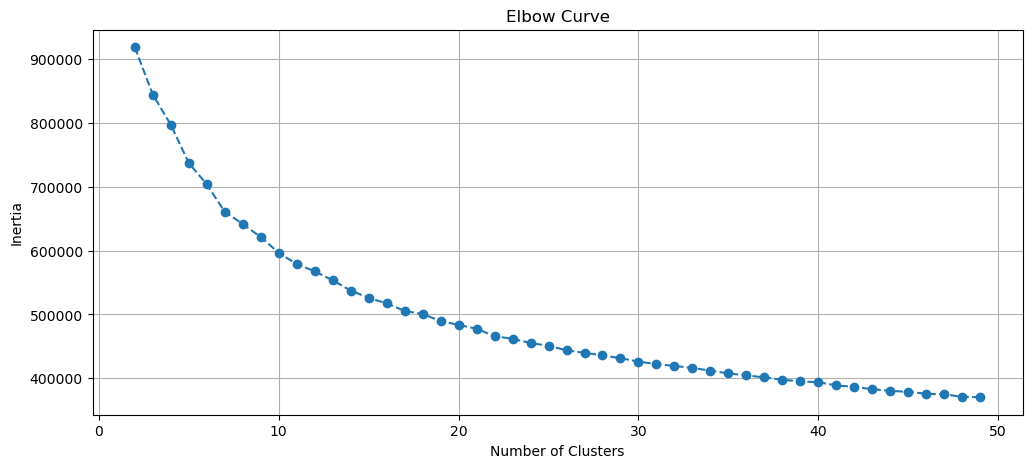

In [9]:
inertia = []
for model in tqdm(k_means_models):
    inertia.append(model.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(12, 5))
plt.plot(cluster_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.grid(True)
plt.show()

# Silhouette method

100%|███████████████████████████████████████████| 48/48 [01:48<00:00,  2.26s/it]


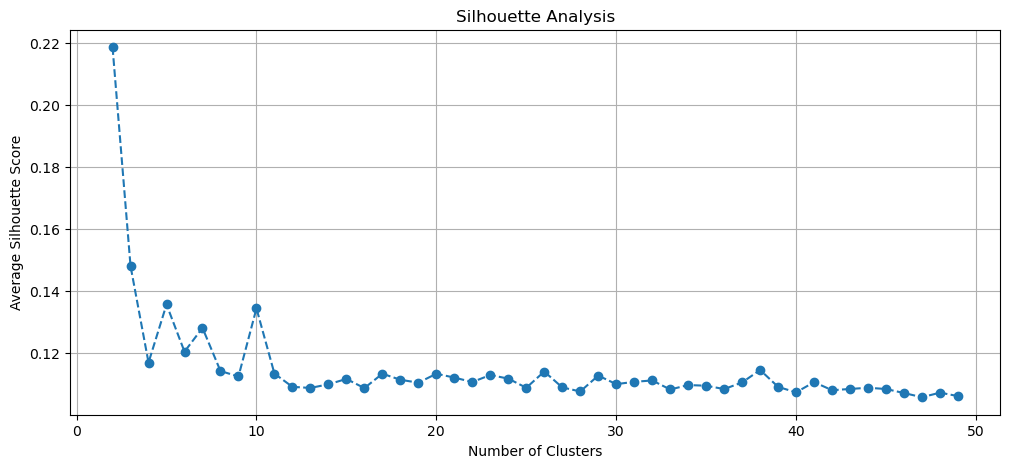

In [16]:
silhouette_scores = []

np.random.seed(42)
indices = range(0, X_reduced.shape[0])
sample_indices = np.random.choice(indices, size = 20000)
X_random_sample = X_reduced[sample_indices, :]

for model in tqdm(k_means_models):
    cluster_labels = model.predict(X_random_sample)
    silhouette_avg = silhouette_score(X_random_sample, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plotting the silhouette scores
plt.figure(figsize=(12, 5))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Analysis')
plt.grid(True)
plt.show()

In [14]:
# model = k_means_models[10]
# clusters = model.predict(X_reduced)

# # Creating a DataFrame with principal components and cluster labels
# pc_df = pd.DataFrame(data= X_reduced[:, 0:2], columns=['PC1', 'PC2'])
# pc_df['Cluster'] = clusters

# # Plotting the 2D scatter plot for visualization
# plt.figure(figsize=(15, 10))
# sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pc_df, palette='tab20', s=60, alpha=0.7)
# plt.title('PCA Scatter Plot of Clusters')
# plt.show()

In [17]:
X_embedded = TSNE(n_components=2, learning_rate='auto', init='random', n_jobs=-1).fit_transform(X_random_sample)
X_embedded.shape

(20000, 2)

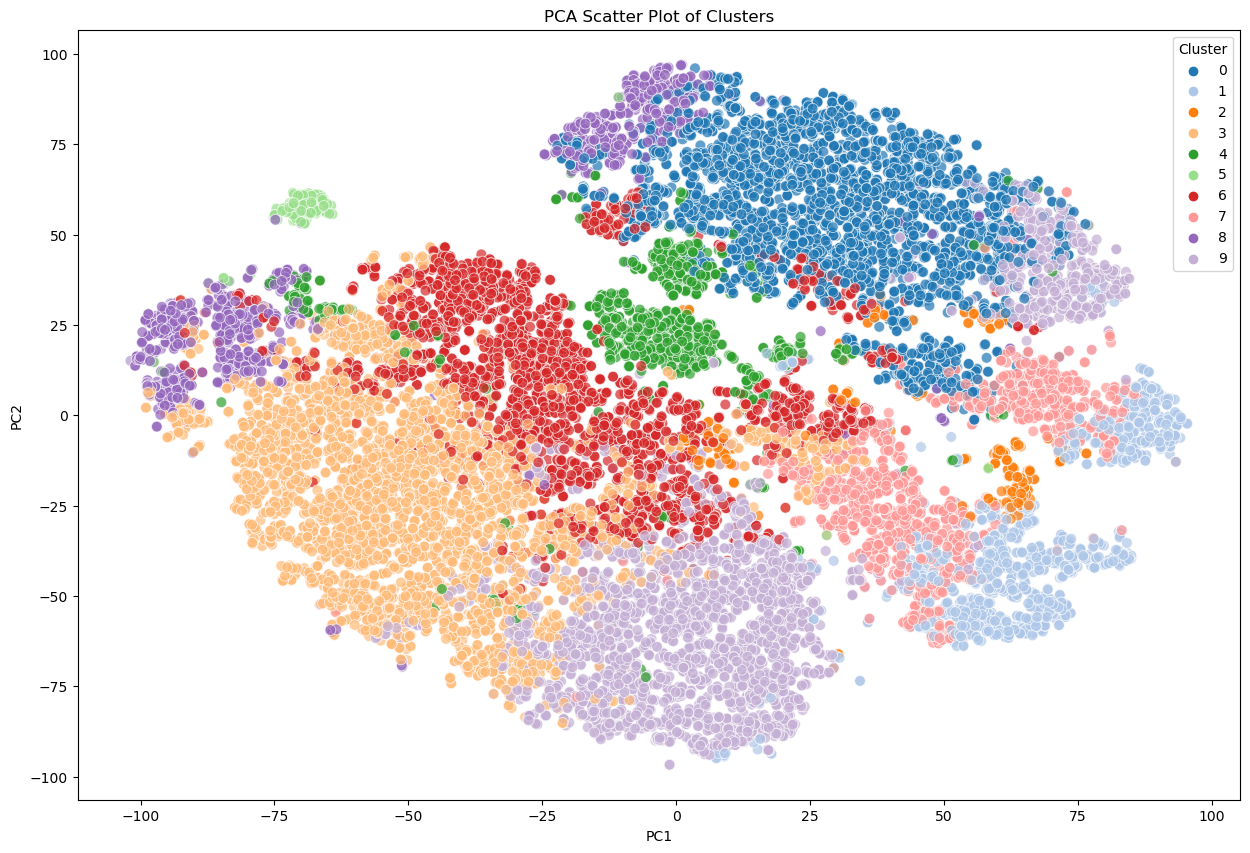

In [18]:
model = k_means_models[8]
clusters = model.predict(X_random_sample)

# Creating a DataFrame with principal components and cluster labels
pc_df = pd.DataFrame(data= X_embedded, columns=['PC1', 'PC2'])
pc_df['Cluster'] = clusters

# Plotting the 2D scatter plot for visualization
plt.figure(figsize=(15, 10))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pc_df, palette='tab20', s=60, alpha=0.7)
plt.title('PCA Scatter Plot of Clusters')
plt.show()

In [75]:
X_embedded_1 = TSNE(n_components=2, learning_rate='auto', init='random', n_jobs=-1, perplexity=10).fit_transform(X_random_sample)
X_embedded_1.shape

(20000, 2)

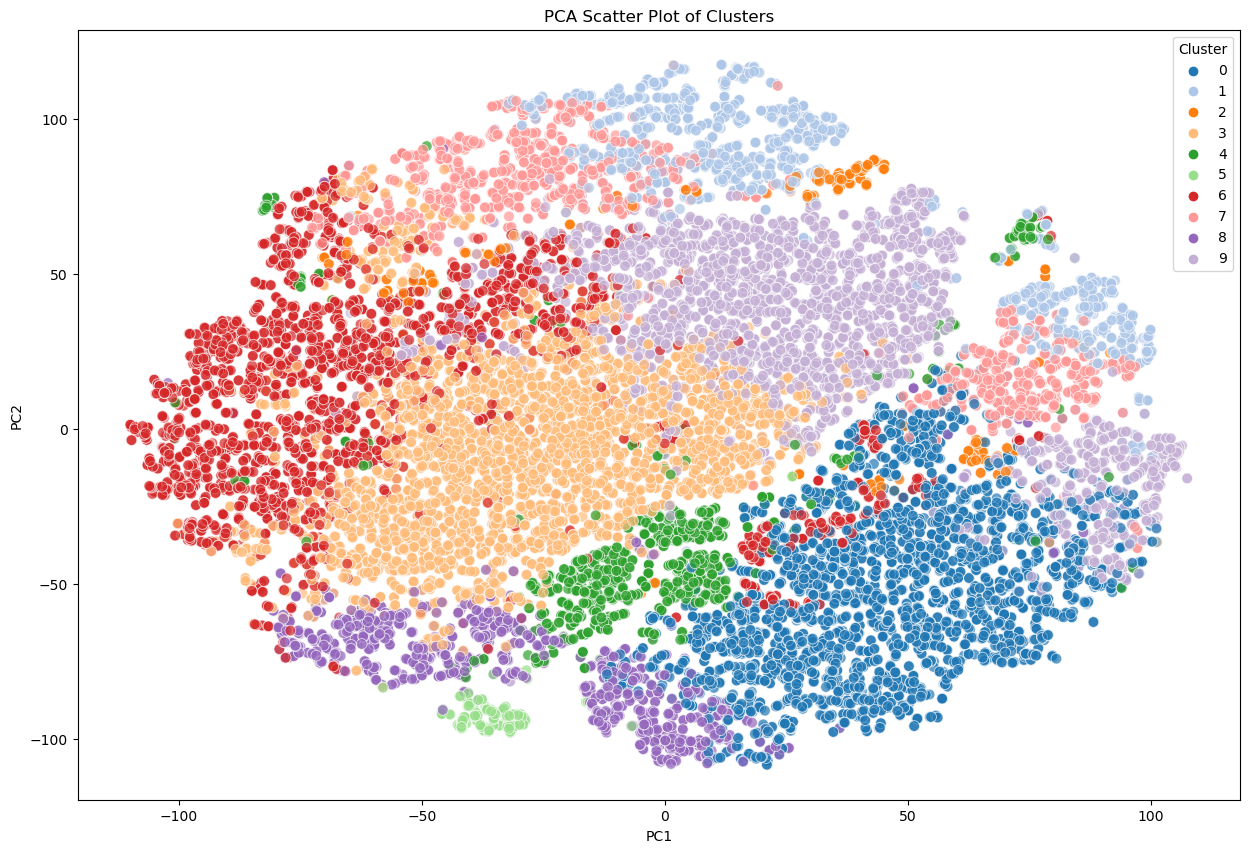

In [76]:
model = k_means_models[8]
clusters = model.predict(X_random_sample)

# Creating a DataFrame with principal components and cluster labels
pc_df = pd.DataFrame(data= X_embedded_1, columns=['PC1', 'PC2'])
pc_df['Cluster'] = clusters

# Plotting the 2D scatter plot for visualization
plt.figure(figsize=(15, 10))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pc_df, palette='tab20', s=60, alpha=0.7)
plt.title('PCA Scatter Plot of Clusters')
plt.show()

In [48]:
predicted_clusters = model.predict(X_random_sample)

In [72]:
cl8_lower_ix = np.where((X_embedded_1[:, 0] < - 80) & (X_embedded_1[:, 1] > -50) & (X_embedded_1[:, 0] < 0))[0]
cl8_upper_ix = np.where((X_embedded_1[:, 0] < - 50) & (X_embedded_1[:, 1] > 50))[0]
cl4_left_ix = np.where((X_embedded_1[:, 0] < - 50) & (X_embedded_1[:, 1] < 50) & (X_embedded_1[:, 1] > 0))[0]

In [65]:
data_sample = data.iloc[sample_indices].copy()
data_sample['cluster'] = clusters

In [73]:
cl8_lower = data_sample.iloc[cl8_lower_ix]
cl8_upper = data_sample.iloc[cl8_upper_ix]
cl4_left = data_sample.iloc[cl4_left_ix]

In [70]:
cl8_lower[cl8_lower.cluster == 8]

,title,artists,id,artists_ids,album,album_id,year,danceability,energy,key,...,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature,cluster
71211,The World Is Filled... (feat. Too Short & Puff...,"The Notorious B.I.G., Diddy, Too $hort",3cRvZp3CEbVKMSVaaCZL83,"5me0Irg2ANcsgc93uaYrpb, 59wfkuBoNyhDMQGCljbUbA...",Life After Death (2014 Remastered Edition),7dRdaGSxgcBdJnrOviQRuB,1997,0.820,0.715,6.0,...,0.1490,0.844,86.054,audio_features,spotify:track:3cRvZp3CEbVKMSVaaCZL83,https://api.spotify.com/v1/tracks/3cRvZp3CEbVK...,https://api.spotify.com/v1/audio-analysis/3cRv...,294800.0,4.0,8
94663,Bluffin (feat. Lil Baby),"Gucci Mane, Lil Baby",1hS8xbWKEifaf0VuFpIY69,"13y7CgLHjMVRMDqxdx0Xdo, 5f7VJjfbwm532GiveGC0ZK",Bluffin (feat. Lil Baby),4L4Vv3wpLhLmMTg313h2zP,2023,0.678,0.483,1.0,...,0.1090,0.120,160.156,audio_features,spotify:track:1hS8xbWKEifaf0VuFpIY69,https://api.spotify.com/v1/tracks/1hS8xbWKEifa...,https://api.spotify.com/v1/audio-analysis/1hS8...,148302.0,4.0,8
89812,I miss the old u,blackbear,3jfFw63n74qkinjHibNPMS,2cFrymmkijnjDg9SS92EPM,digital druglord,0a8WSH44kA5hR4MQ6LyFDB,2017,0.717,0.804,7.0,...,0.5270,0.362,133.012,audio_features,spotify:track:3jfFw63n74qkinjHibNPMS,https://api.spotify.com/v1/tracks/3jfFw63n74qk...,https://api.spotify.com/v1/audio-analysis/3jfF...,211128.0,4.0,8
2695,Pick Up,Tiwa Savage,1deimiQlzca70jziGDtTsm,1hNaHKp2Za5YdOAG0WnRbc,Pick Up,17Q3HSD6YVtEGWuhN4HrPU,2023,0.588,0.677,9.0,...,0.1620,0.813,147.921,audio_features,spotify:track:1deimiQlzca70jziGDtTsm,https://api.spotify.com/v1/tracks/1deimiQlzca7...,https://api.spotify.com/v1/audio-analysis/1dei...,156551.0,5.0,8
87939,Change Locations,"Drake, Future",4gowy3WT6D1yhMLgRBlf9C,"3TVXtAsR1Inumwj472S9r4, 1RyvyyTE3xzB2ZywiAwp0i",What A Time To Be Alive,1ozpmkWcCHwsQ4QTnxOOdT,2015,0.787,0.329,0.0,...,0.1180,0.209,137.850,audio_features,spotify:track:4gowy3WT6D1yhMLgRBlf9C,https://api.spotify.com/v1/tracks/4gowy3WT6D1y...,https://api.spotify.com/v1/audio-analysis/4gow...,220862.0,4.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17230,Moment 4 Life,"Nicki Minaj, Drake",1ia019RqDK2o4QiANR1Dyn,"0hCNtLu0JehylgoiP8L4Gh, 3TVXtAsR1Inumwj472S9r4",Pink Friday,3LJhoYn4nnHmvPRO3ppbsl,2010,0.475,0.882,11.0,...,0.2410,0.369,98.001,audio_features,spotify:track:1ia019RqDK2o4QiANR1Dyn,https://api.spotify.com/v1/tracks/1ia019RqDK2o...,https://api.spotify.com/v1/audio-analysis/1ia0...,279307.0,4.0,8
89566,Off the Wall!,"XXXTENTACION, Ski Mask The Slump God",0GRmh4ZlobfhvDE9L4CbOs,"15UsOTVnJzReFVN1VCnxy4, 2rhFzFmezpnW82MNqEKVry","XXXTENTACION Presents: Members Only, Vol. 3",7ifkO4gppMVf0HNy7JJDHn,2017,0.834,0.374,1.0,...,0.1340,0.545,140.001,audio_features,spotify:track:0GRmh4ZlobfhvDE9L4CbOs,https://api.spotify.com/v1/tracks/0GRmh4Zlobfh...,https://api.spotify.com/v1/audio-analysis/0GRm...,203494.0,4.0,8
71153,Medley: Intro,JAY-Z,0EWlF8mbOqr2hCK6EnDW9y,3nFkdlSjzX9mRTtwJOzDYB,"In My Lifetime, Vol.1",2nJapeqTbOhnhHUhh5tzpB,1997,0.645,0.595,8.0,...,0.0603,0.715,89.093,audio_features,spotify:track:0EWlF8mbOqr2hCK6EnDW9y,https://api.spotify.com/v1/tracks/0EWlF8mbOqr2...,https://api.spotify.com/v1/audio-analysis/0EWl...,201760.0,4.0,8
71633,You Ain't a Killer,Big Pun,14Ai4sTxWbQpNymhpQKuES,2Xu7q46Hf02xOoEIm4E1Qs,Capital Punishment,3IIHk2ZLXKWuVAjCbQ9g4Y,1998,0.724,0.887,6.0,...,0.1120,0.745,90.945,audio_features,spotify:track:14Ai4sTxWbQpNymhpQKuES,https://api.spotify.com/v1/tracks/14Ai4sTxWbQp...,https://api.spotify.com/v1/audio-analysis/14Ai...,254867.0,4.0,8


In [71]:
cl8_upper[cl8_upper.cluster == 8]

,title,artists,id,artists_ids,album,album_id,year,danceability,energy,key,...,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature,cluster
66803,U.N.I.T.Y.,Queen Latifah,4OxXBAN51tjVBEjSwuWWbv,5m7wCUhYhBh7A3A3YMxrbt,Black Reign,7fSY44jcjgt6jGzSQdZZjJ,1993,0.679,0.468,4.0,...,0.2030,0.503,94.126,audio_features,spotify:track:4OxXBAN51tjVBEjSwuWWbv,https://api.spotify.com/v1/tracks/4OxXBAN51tjV...,https://api.spotify.com/v1/audio-analysis/4OxX...,250840.0,4.0,8
86807,Choices (Yup),E-40,5vIu19A3EEdHgFM4Cba6F4,3crnzLy8R4lVwaigKEOz7V,Sharp On All 4 Corners (Deluxe Edition),42wO2hmYMe3tQGMoshwFsI,2014,0.892,0.607,9.0,...,0.0909,0.244,120.000,audio_features,spotify:track:5vIu19A3EEdHgFM4Cba6F4,https://api.spotify.com/v1/tracks/5vIu19A3EEdH...,https://api.spotify.com/v1/audio-analysis/5vIu...,272720.0,4.0,8
89474,Codeine Dreaming (feat. Lil Wayne),"Kodak Black, Lil Wayne",4DTpngLjoHj5gFxEZFeD3J,"46SHBwWsqBkxI7EeeBEQG7, 55Aa2cqylxrFIXC767Z865",Project Baby 2: All Grown Up (Deluxe Edition),0D2kFxAO1YPAuxAtP23g0p,2017,0.736,0.604,1.0,...,0.1240,0.574,155.007,audio_features,spotify:track:4DTpngLjoHj5gFxEZFeD3J,https://api.spotify.com/v1/tracks/4DTpngLjoHj5...,https://api.spotify.com/v1/audio-analysis/4DTp...,264532.0,4.0,8
90084,"Never Recover (Lil Baby & Gunna, Drake)","Lil Baby, Gunna, Drake",6wWaVoUOzLQJHd3bWAUpdZ,"5f7VJjfbwm532GiveGC0ZK, 2hlmm7s2ICUX0LVIhVFlZQ...",Drip Harder,2yXnY2NiaZk9QiJJittS81,2018,0.753,0.686,1.0,...,0.1930,0.886,132.055,audio_features,spotify:track:6wWaVoUOzLQJHd3bWAUpdZ,https://api.spotify.com/v1/tracks/6wWaVoUOzLQJ...,https://api.spotify.com/v1/audio-analysis/6wWa...,194732.0,4.0,8
67270,"The Chase, Part II",A Tribe Called Quest,5VEKqp658KuE7uIgTQDyVT,09hVIj6vWgoCDtT03h8ZCa,Midnight Marauders,4v5x3Oo3UjQ9YmF3hRAip5,1993,0.803,0.668,11.0,...,0.4480,0.695,93.996,audio_features,spotify:track:5VEKqp658KuE7uIgTQDyVT,https://api.spotify.com/v1/tracks/5VEKqp658KuE...,https://api.spotify.com/v1/audio-analysis/5VEK...,242373.0,4.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70218,A Who Seh Ne Dun (Wake De Man),Cutty Ranks,47ue87R7xu6b4c1l6Abzm1,4qDGDPGMIJuIvPfUGe0Ngg,Six Million Ways To Die,3Iz5HsFBnKLin5AtGWQcpB,1996,0.903,0.717,5.0,...,0.1280,0.645,94.313,audio_features,spotify:track:47ue87R7xu6b4c1l6Abzm1,https://api.spotify.com/v1/tracks/47ue87R7xu6b...,https://api.spotify.com/v1/audio-analysis/47ue...,206573.0,4.0,8
88890,Bailando Con la Muerte,La Santa Grifa,2vkh4fXp3muk6hgOP7luSu,1oH2B8tcHn4Gpl2bmmyd4A,"Hasta Donde Se Pueda, Vol. 2",69Jo9dSkh9nTPpASqM49Gk,2016,0.736,0.526,0.0,...,0.0972,0.565,80.494,audio_features,spotify:track:2vkh4fXp3muk6hgOP7luSu,https://api.spotify.com/v1/tracks/2vkh4fXp3muk...,https://api.spotify.com/v1/audio-analysis/2vkh...,399099.0,4.0,8
75147,Air Force Ones,"Nelly, Murphy Lee, Ali, Kyjuan",7kAFSrTIOiVZ0gnHBuAH3l,"2gBjLmx6zQnFGQJCAQpRgw, 07W0YfsvHM7Mw7Bq48Mb0A...",Nellyville,4HUUHHXBXImwksfbSPqE7q,2002,0.784,0.459,4.0,...,0.0790,0.618,164.062,audio_features,spotify:track:7kAFSrTIOiVZ0gnHBuAH3l,https://api.spotify.com/v1/tracks/7kAFSrTIOiVZ...,https://api.spotify.com/v1/audio-analysis/7kAF...,304000.0,4.0,8
91937,Life Is Good (feat. Drake),"Future, Drake",1K5KBOgreBi5fkEHvg5ap3,"1RyvyyTE3xzB2ZywiAwp0i, 3TVXtAsR1Inumwj472S9r4",High Off Life,4bNPOFOzxGhF5jhfIK6lit,2020,0.795,0.574,2.0,...,0.1500,0.537,142.053,audio_features,spotify:track:1K5KBOgreBi5fkEHvg5ap3,https://api.spotify.com/v1/tracks/1K5KBOgreBi5...,https://api.spotify.com/v1/audio-analysis/1K5K...,237918.0,4.0,8


In [74]:
cl4_left[cl4_left.cluster == 4]

,title,artists,id,artists_ids,album,album_id,year,danceability,energy,key,...,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature,cluster
43001,Dirty Old Egg-Suckin' Dog - Live at Folsom Sta...,Johnny Cash,2DATiJtJ75vDhCL59LWhlI,6kACVPfCOnqzgfEF5ryl0x,At Folsom Prison,4TJIdlY9hGSSTO1kUs1neh,1968,0.511,0.245,3.0,...,0.703,0.650,128.902,audio_features,spotify:track:2DATiJtJ75vDhCL59LWhlI,https://api.spotify.com/v1/tracks/2DATiJtJ75vD...,https://api.spotify.com/v1/audio-analysis/2DAT...,76947.0,3.0,4
25184,Gentlemen Prefer Blondes: Diamonds Are a Girl'...,"Jule Styne, Carol Channing, Milton Rosenstock",6xbdrkhFTOn51h8F2Q4yDN,"3vAPM1qiCuClMH5DNbAgtC, 3DKPVHC4GzISLpUdAapGiZ...",Gentlemen Prefer Blondes (Original Broadway Ca...,2wXobM7wF7SPwnw3VrXict,1950,0.587,0.236,10.0,...,0.778,0.559,93.432,audio_features,spotify:track:6xbdrkhFTOn51h8F2Q4yDN,https://api.spotify.com/v1/tracks/6xbdrkhFTOn5...,https://api.spotify.com/v1/audio-analysis/6xbd...,177760.0,4.0,4
91906,Roll Me Up and Smoke Me When I Die - Live,"Willie Nelson, Jimmy Buffett, Emmylou Harris, ...",5iis9J2sptrUy0VIpFVIg1,"5W5bDNCqJ1jbCgTxDD0Cb3, 28AyklUmMECPwdfo8NEsV0...",Willie Nelson American Outlaw (Live),5heTM7q5ly9IPwJIFSbKLp,2020,0.427,0.813,0.0,...,0.873,0.344,106.859,audio_features,spotify:track:5iis9J2sptrUy0VIpFVIg1,https://api.spotify.com/v1/tracks/5iis9J2sptrU...,https://api.spotify.com/v1/audio-analysis/5iis...,134267.0,3.0,4
90272,all the kids are depressed,Jeremy Zucker,75ls0gurX68lUmMjE7QcsE,3gIRvgZssIb9aiirIg0nI3,glisten,14lSyFVCuhvEoW7ogOIzD0,2018,0.773,0.437,9.0,...,0.544,0.707,103.861,audio_features,spotify:track:75ls0gurX68lUmMjE7QcsE,https://api.spotify.com/v1/tracks/75ls0gurX68l...,https://api.spotify.com/v1/audio-analysis/75ls...,169973.0,4.0,4
45525,Misty Mountain Hop - Remaster,Led Zeppelin,5NnZ4JJxWiqqhYNu3rwmFj,36QJpDe2go2KgaRleHCDTp,Led Zeppelin IV (Deluxe Edition),44Ig8dzqOkvkGDzaUof9lK,1971,0.470,0.806,2.0,...,0.860,0.787,132.359,audio_features,spotify:track:5NnZ4JJxWiqqhYNu3rwmFj,https://api.spotify.com/v1/tracks/5NnZ4JJxWiqq...,https://api.spotify.com/v1/audio-analysis/5NnZ...,278907.0,4.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49002,I'm Leaving It All Up To You,Donny & Marie Osmond,2Ar5ZYieSYLx8xfNCCgzFc,7d8R11w4QG2ihJeTaZq37F,I'm Leaving It All Up To You,1ObfRt5lHT1UCkq15dhdjJ,1974,0.513,0.717,11.0,...,0.500,0.812,108.834,audio_features,spotify:track:2Ar5ZYieSYLx8xfNCCgzFc,https://api.spotify.com/v1/tracks/2Ar5ZYieSYLx...,https://api.spotify.com/v1/audio-analysis/2Ar5...,168880.0,3.0,4
74362,Superstar,Toy-Box,5U5ToZKDyfVoXO9BUTVSuI,0BYEp3eyHK9Wsp4t2Ad1R8,ToyRide,6tYcylH47lYDDaLpZao5Sc,2001,0.693,0.991,6.0,...,0.971,0.952,140.011,audio_features,spotify:track:5U5ToZKDyfVoXO9BUTVSuI,https://api.spotify.com/v1/tracks/5U5ToZKDyfVo...,https://api.spotify.com/v1/audio-analysis/5U5T...,187867.0,4.0,4
23694,Struggle,Leon Timbo,6SAeWIxjMvNkzElv4cz43s,5sh0bpSEIvnWiJxZKFhJ8S,"Lovers And Fools, Vol. 2",514CYU9q0GHkgm481oj3U6,2022,0.520,0.824,11.0,...,0.636,0.667,93.086,audio_features,spotify:track:6SAeWIxjMvNkzElv4cz43s,https://api.spotify.com/v1/tracks/6SAeWIxjMvNk...,https://api.spotify.com/v1/audio-analysis/6SAe...,280416.0,4.0,4
63090,Thieves,Ministry,6KCthSzW230fnf6IygPaI0,1DXylZlWbVvlckNqwvjTEt,The Mind Is a Terrible Thing to Taste,2Z73HeYQNCf5T8dzzHaoz5,1989,0.646,0.881,5.0,...,0.727,0.359,111.275,audio_features,spotify:track:6KCthSzW230fnf6IygPaI0,https://api.spotify.com/v1/tracks/6KCthSzW230f...,https://api.spotify.com/v1/audio-analysis/6KCt...,301427.0,4.0,4


In [78]:
predicted_clusters_all = model.predict(X_scaled)
data_clustered = data.copy()
data_clustered['cluster'] = predicted_clusters_all
data_clustered

,title,artists,id,artists_ids,album,album_id,year,danceability,energy,key,...,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature,cluster
0,Lego,Mark Forster,3eIWbWHQpCRJQ8kCa36tTA,7qXzy6c5RWT0XlVQcOBIDG,Lego,1vPl595eQRgN2gGVzPt6jQ,2023,0.834,0.592,7.0,...,0.1120,0.697,128.103,audio_features,spotify:track:3eIWbWHQpCRJQ8kCa36tTA,https://api.spotify.com/v1/tracks/3eIWbWHQpCRJ...,https://api.spotify.com/v1/audio-analysis/3eIW...,160920.0,4.0,8
1,Liquor and Weed,Coi Leray,0o4HDwcuJ6RVHVtcOGq8rB,6AMd49uBDJfhf30Ak2QR5s,Blue Moon,55LEmUjDllfMjPxzSSm4HU,2023,0.610,0.590,2.0,...,0.0910,0.293,170.061,audio_features,spotify:track:0o4HDwcuJ6RVHVtcOGq8rB,https://api.spotify.com/v1/tracks/0o4HDwcuJ6RV...,https://api.spotify.com/v1/audio-analysis/0o4H...,157467.0,4.0,8
2,We Could Be Love,"Hayden James, AR/CO",3y20RxZMr3wZMvhC78jc8O,"4csQIMQm6vI2A2SCVDuM2z, 7mGI9Sd66FqHjIkwzkgbG7",We Could Be Love,4p3Eue4nXRORfFiID2811z,2023,0.608,0.739,10.0,...,0.1300,0.301,130.025,audio_features,spotify:track:3y20RxZMr3wZMvhC78jc8O,https://api.spotify.com/v1/tracks/3y20RxZMr3wZ...,https://api.spotify.com/v1/audio-analysis/3y20...,189113.0,4.0,0
3,Rosaroter Rausch,BEVN,1JxVRwmJkEwHFv4lv1EIgP,6yhoNaKEJd3CH33hl26How,Rosaroter Rausch,7Am1uzB89xuCN0jthEmHYi,2023,0.680,0.329,7.0,...,0.1120,0.299,80.039,audio_features,spotify:track:1JxVRwmJkEwHFv4lv1EIgP,https://api.spotify.com/v1/tracks/1JxVRwmJkEwH...,https://api.spotify.com/v1/audio-analysis/1JxV...,196280.0,4.0,9
4,Your Bones,Chelsea Cutler,6bIJHwyaNb1txgOKbYh0rH,5JMLG56F1X5mFmWNmS0iAp,Your Bones,4DYdcN6zXdIH8lWmtd1FQV,2023,0.668,0.618,1.0,...,0.0953,0.364,105.049,audio_features,spotify:track:6bIJHwyaNb1txgOKbYh0rH,https://api.spotify.com/v1/tracks/6bIJHwyaNb1t...,https://api.spotify.com/v1/audio-analysis/6bIJ...,159400.0,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95103,Something in the Orange,Zach Bryan,61IPyGRosl1w74cNvT1nMw,40ZNYROS4zLfyyBSs2PGe2,Harris Lake Cottage Songs,1qk8N9vmGJ2sS74RKioIbV,2023,0.369,0.192,4.0,...,0.0954,0.148,175.212,audio_features,spotify:track:61IPyGRosl1w74cNvT1nMw,https://api.spotify.com/v1/tracks/61IPyGRosl1w...,https://api.spotify.com/v1/audio-analysis/61IP...,228013.0,3.0,9
95104,Something in the Orange,Zach Bryan,3YGhIVKHYLT8eOdJbqgzds,40ZNYROS4zLfyyBSs2PGe2,Smith Lake Cottage Songs,3EJgdfeYitTAK4YVGFm9Wr,2023,0.369,0.192,4.0,...,0.0954,0.148,175.212,audio_features,spotify:track:3YGhIVKHYLT8eOdJbqgzds,https://api.spotify.com/v1/tracks/3YGhIVKHYLT8...,https://api.spotify.com/v1/audio-analysis/3YGh...,228013.0,3.0,9
95105,Something in the Orange,Zach Bryan,7xu2HwiI65XGl0YFG6v17j,40ZNYROS4zLfyyBSs2PGe2,Minnicock Cottage Songs,1hdOu4LeN0SawbvFbMV4SS,2023,0.369,0.192,4.0,...,0.0954,0.148,175.212,audio_features,spotify:track:7xu2HwiI65XGl0YFG6v17j,https://api.spotify.com/v1/tracks/7xu2HwiI65XG...,https://api.spotify.com/v1/audio-analysis/7xu2...,228013.0,3.0,9
95106,Something in the Orange,Zach Bryan,3F7KbU4KqkMQhb5Dln9xdX,40ZNYROS4zLfyyBSs2PGe2,Lake St Peter Cottage Songs,2TLxuke6oT1H46upKPLTo0,2023,0.369,0.192,4.0,...,0.0954,0.148,175.212,audio_features,spotify:track:3F7KbU4KqkMQhb5Dln9xdX,https://api.spotify.com/v1/tracks/3F7KbU4KqkMQ...,https://api.spotify.com/v1/audio-analysis/3F7K...,228013.0,3.0,9


In [29]:
data_clustered[data_clustered['cluster']==0].head(10)

,title,artists,id,artists_ids,album,album_id,year,danceability,energy,key,...,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature,cluster
2,We Could Be Love,"Hayden James, AR/CO",3y20RxZMr3wZMvhC78jc8O,"4csQIMQm6vI2A2SCVDuM2z, 7mGI9Sd66FqHjIkwzkgbG7",We Could Be Love,4p3Eue4nXRORfFiID2811z,2023,0.608,0.739,10.0,...,0.1300,0.301,130.025,audio_features,spotify:track:3y20RxZMr3wZMvhC78jc8O,https://api.spotify.com/v1/tracks/3y20RxZMr3wZ...,https://api.spotify.com/v1/audio-analysis/3y20...,189113.0,4.0,0
4,Your Bones,Chelsea Cutler,6bIJHwyaNb1txgOKbYh0rH,5JMLG56F1X5mFmWNmS0iAp,Your Bones,4DYdcN6zXdIH8lWmtd1FQV,2023,0.668,0.618,1.0,...,0.0953,0.364,105.049,audio_features,spotify:track:6bIJHwyaNb1txgOKbYh0rH,https://api.spotify.com/v1/tracks/6bIJHwyaNb1t...,https://api.spotify.com/v1/audio-analysis/6bIJ...,159400.0,4.0,0
5,NICOTINE,clide,6eEBSTxBaueHbOBAfnjpFu,5BmVxdltuGK9CqZVaiUEKy,NICOTINE,2hIUd79MFB4Sa5YWxDRdxY,2023,0.695,0.786,4.0,...,0.1440,0.582,118.006,audio_features,spotify:track:6eEBSTxBaueHbOBAfnjpFu,https://api.spotify.com/v1/tracks/6eEBSTxBaueH...,https://api.spotify.com/v1/audio-analysis/6eEB...,173644.0,4.0,0
6,Nur ein Blick,"ELA, diaven",4tMoeZVGYPcrocvh0YYydf,"4L3QRSecSDcMsyJ6AuDcqb, 73lvMyBnQcxjGo2JRaDtLG",Nur ein Blick,5hmxfJ92fGIcQrfUtI87QV,2023,0.648,0.895,11.0,...,0.2950,0.674,129.917,audio_features,spotify:track:4tMoeZVGYPcrocvh0YYydf,https://api.spotify.com/v1/tracks/4tMoeZVGYPcr...,https://api.spotify.com/v1/audio-analysis/4tMo...,183494.0,4.0,0
8,Toddla T x Aitch - Hide N Seek (feat. TAET),"Toddla T, Aitch, TAET",2K2FgAoIodVpU9bBlU7hhP,"3l1C23aRp4lfkBK3lLAp2m, 2PJEagPIxaBugeMjIyKVXF...",Toddla T x Aitch - Hide N Seek (feat. TAET),16JAgjFAEpguF9mMQV89EQ,2023,0.695,0.962,1.0,...,0.1070,0.823,135.044,audio_features,spotify:track:2K2FgAoIodVpU9bBlU7hhP,https://api.spotify.com/v1/tracks/2K2FgAoIodVp...,https://api.spotify.com/v1/audio-analysis/2K2F...,168015.0,4.0,0
9,Street Sweeper (feat. Swae Lee),"CHASE B, Swae Lee",2NqpZD00BADhsvldFVdO0j,"2cMVIRpseAO7fJAxNfg6rD, 1zNqQNIdeOUZHb8zbZRFMX",Street Sweeper (feat. Swae Lee),732QIKM3qkHhwZgxaZsBLZ,2023,0.701,0.800,10.0,...,0.2390,0.550,150.015,audio_features,spotify:track:2NqpZD00BADhsvldFVdO0j,https://api.spotify.com/v1/tracks/2NqpZD00BADh...,https://api.spotify.com/v1/audio-analysis/2Nqp...,160668.0,4.0,0
10,Baila Chica,"Loona, Miguel Lemos",5ONXpK7u3xfmTs7s9AMRML,"7ugN9bU7x54gVI2295brJF, 67pvXlQpC44A5SiWO00wiQ",Baila Chica,6Q3H6NKeDoMcyHCM8JeA0B,2023,0.698,0.921,9.0,...,0.0718,0.618,148.107,audio_features,spotify:track:5ONXpK7u3xfmTs7s9AMRML,https://api.spotify.com/v1/tracks/5ONXpK7u3xfm...,https://api.spotify.com/v1/audio-analysis/5ONX...,140878.0,4.0,0
15,C’est la Vie,MIKA,6BV2gqsxAWqZKqM8Kx4GLb,5MmVJVhhYKQ86izuGHzJYA,C’est la Vie,3SjBLAvQwwhiAUnrifGlrD,2023,0.783,0.718,1.0,...,0.1080,0.729,123.987,audio_features,spotify:track:6BV2gqsxAWqZKqM8Kx4GLb,https://api.spotify.com/v1/tracks/6BV2gqsxAWqZ...,https://api.spotify.com/v1/audio-analysis/6BV2...,208469.0,4.0,0
16,Wonderful & Great,Netta,3Ua9ii7k19DUUaqxDo2ivr,4Z4afeDmHFxPmJorIwupbZ,Wonderful & Great,5iTRTDFuXfvZO6Uv9hMlm5,2023,0.965,0.789,11.0,...,0.0608,0.955,124.994,audio_features,spotify:track:3Ua9ii7k19DUUaqxDo2ivr,https://api.spotify.com/v1/tracks/3Ua9ii7k19DU...,https://api.spotify.com/v1/audio-analysis/3Ua9...,144281.0,4.0,0
18,Need Your Love,"Felix Cartal, Karen Harding",2TSU0Ti5e5beL9mYlHbYQu,"6roDXEmZ6AARdOUv6x5U2v, 1QOHbhVRpDoNtRkz79si6b",Need Your Love,12PQ5IbSS0mm4XMgQubpX9,2023,0.613,0.882,5.0,...,0.3030,0.255,125.975,audio_features,spotify:track:2TSU0Ti5e5beL9mYlHbYQu,https://api.spotify.com/v1/tracks/2TSU0Ti5e5be...,https://api.spotify.com/v1/audio-analysis/2TSU...,176042.0,4.0,0


In [79]:
data_clustered.to_csv('clustered_tracks.csv', index=False)

In [80]:
from joblib import dump

# Save the model to a file
dump(model, 'kmeans10.joblib')

['kmeans10.joblib']

In [81]:
dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [82]:
data_clustered['cluster'].value_counts()

cluster
3    20664
9    17132
0    16557
6    14529
1     7029
7     6864
8     5584
4     4698
2     1330
5      721
Name: count, dtype: int64

In [84]:
data_clustered[data_clustered['cluster']==5]

,title,artists,id,artists_ids,album,album_id,year,danceability,energy,key,...,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature,cluster
618,1999,"Antifuchs, TACKA77",032jUldDki3r4XOR6IIPUg,"5cPSq1945RxgQSIHkxp3Jq, 2qW5OrEpn4I48VeS2p9sKb",1999,38NjWl2juykNM8jWThMpnd,2023,0.788,0.48600,4.0,...,0.1310,0.7350,80.052,audio_features,spotify:track:032jUldDki3r4XOR6IIPUg,https://api.spotify.com/v1/tracks/032jUldDki3r...,https://api.spotify.com/v1/audio-analysis/032j...,172500.0,4.0,5
668,25 Mann,Azet,7gC8OO5ORfuqX4OrE9EQtE,39KEQQAG9JhIt71g9NEVhh,25 Mann,2FhHVeeDMN6VB6vTBecEos,2023,0.681,0.56700,2.0,...,0.1110,0.0884,98.226,audio_features,spotify:track:7gC8OO5ORfuqX4OrE9EQtE,https://api.spotify.com/v1/tracks/7gC8OO5ORfuq...,https://api.spotify.com/v1/audio-analysis/7gC8...,160427.0,5.0,5
3054,Set Ajc,"Ajuliacosta, Mac Júlia, N.I.N.A, Alt Niss, Nan...",4Rm0KWTctjT6Fw0yny87Gq,"0eHkGhhUyp3LZdtZjaA8gd, 0xXEI1dXDaCOmkIPNYtPWF...",Set Ajc,3DymWr7vqMdUQbX7ko9OFh,2021,0.640,0.41700,2.0,...,0.0928,0.6480,167.949,audio_features,spotify:track:4Rm0KWTctjT6Fw0yny87Gq,https://api.spotify.com/v1/tracks/4Rm0KWTctjT6...,https://api.spotify.com/v1/audio-analysis/4Rm0...,343399.0,4.0,5
3074,Deixar na B,Mc Luanna,3KYHgasdHqKROkh17t1LT9,6VpdTQWCRE01WVoEuby2a6,Deixar na B,4INsklfCI6hFcmWBc2MkF3,2022,0.485,0.70900,10.0,...,0.1670,0.6390,87.235,audio_features,spotify:track:3KYHgasdHqKROkh17t1LT9,https://api.spotify.com/v1/tracks/3KYHgasdHqKR...,https://api.spotify.com/v1/audio-analysis/3KYH...,129826.0,5.0,5
4868,White Stars,Dormant Clouds,7Fys0m6kGltWbqYeSAGAMx,08MfBIg9r4Dzm2ISLs1Us7,White Stars,0BLt2AQUVsNb1RqZaBOxf0,2022,0.101,0.00351,1.0,...,0.1110,0.0152,79.637,audio_features,spotify:track:7Fys0m6kGltWbqYeSAGAMx,https://api.spotify.com/v1/tracks/7Fys0m6kGltW...,https://api.spotify.com/v1/audio-analysis/7Fys...,165500.0,3.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92475,Perc Popper,"Shoreline Mafia, OHGEESY, Fenix Flexin",6EeMWRDPBFpboU5DjA7Jrl,"4tYSBptyGeVyZsk8JC4JHZ, 3ppQEG71r7jVpI8RudzycF...",Perc Popper,7sclcxeOJzYHxMLuFxLSBP,2020,0.936,0.33900,1.0,...,0.2110,0.2730,105.165,audio_features,spotify:track:6EeMWRDPBFpboU5DjA7Jrl,https://api.spotify.com/v1/tracks/6EeMWRDPBFpb...,https://api.spotify.com/v1/audio-analysis/6EeM...,120857.0,4.0,5
92480,Anxiety Freestyle,Sleepy Hallow,2K7b2hTAXej5y014uvwUA6,6EPlBSH2RSiettczlz7ihV,Sleepy Hallow Presents: Sleepy For President,3P7EIeXmzJQNT1xs4Q6Xzd,2020,0.832,0.30000,4.0,...,0.1150,0.5350,73.995,audio_features,spotify:track:2K7b2hTAXej5y014uvwUA6,https://api.spotify.com/v1/tracks/2K7b2hTAXej5...,https://api.spotify.com/v1/audio-analysis/2K7b...,117033.0,4.0,5
92490,Eyes Blue Like The Atlantic (feat. Subvrbs),"Sista Prod, Subvrbs",0qUcpOOna3kkrwfqky85e1,"7cSbcJTJBBSXDjRNR2qD61, 0NVy1xEsz4i8pX33Scv75n",Eyes Blue Like The Atlantic (feat. Subvrbs),5UYjxc4HIYeesKS0WJlhEI,2020,0.768,0.33900,0.0,...,0.2610,0.5680,76.229,audio_features,spotify:track:0qUcpOOna3kkrwfqky85e1,https://api.spotify.com/v1/tracks/0qUcpOOna3kk...,https://api.spotify.com/v1/audio-analysis/0qUc...,154599.0,4.0,5
93229,TikTok,Blueface,5fMAZiE6Kdqo3fWIOXMtH6,3Fl1V19tmjt57oBdxXKAjJ,TikTok,2iWXf6Z3rPyxIVrOaY0tyM,2021,0.752,0.56100,3.0,...,0.2200,0.5580,206.135,audio_features,spotify:track:5fMAZiE6Kdqo3fWIOXMtH6,https://api.spotify.com/v1/tracks/5fMAZiE6Kdqo...,https://api.spotify.com/v1/audio-analysis/5fMA...,135146.0,4.0,5
